In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('Auezov district.csv')
df

,Year,Population,District Population,Migration,Birth,Death
0,2000,1 130 439,282 900,NaN,NaN,NaN
1,2001,1 128 759,283 632,NaN,NaN,NaN
2,2002,1 132 424,285 707,NaN,NaN,NaN
3,2003,1 149 641,291 275,124.0,"5,815","2,965"
4,2004,1 175 208,298 249,93.0,"6,769","2,934"
5,2005,1 209 485,305 500,269.0,"7,349","3,153"
6,2006,1 247 896,316 201,935.0,"8,893","2,968"
7,2007,1 287 246,329 282,675.0,"9,974","2,963"
8,2008,1 324 739,342 451,658.0,"10,691","3,147"
9,2009,1 361 877,289 512,160.0,"5,566","2,376"


In [3]:
df = df.dropna()
df['Population'] = df['Population'].astype(str).str.replace(' ', '').astype(int)
df['District Population'] = df['District Population'].astype(str).str.replace(' ', '').astype(int)
df['Birth'] = df['Birth'].astype(str).str.replace(',', '.').astype(float)
df['Death'] = df['Death'].astype(str).str.replace(',', '.').astype(float)


df

/tmp/ipykernel_5100/3957259955.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Population'] = df['Population'].astype(str).str.replace(' ', '').astype(int)
/tmp/ipykernel_5100/3957259955.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['District Population'] = df['District Population'].astype(str).str.replace(' ', '').astype(int)
/tmp/ipykernel_5100/3957259955.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

,Year,Population,District Population,Migration,Birth,Death
3,2003,1149641,291275,124.0,5.815,2.965
4,2004,1175208,298249,93.0,6.769,2.934
5,2005,1209485,305500,269.0,7.349,3.153
6,2006,1247896,316201,935.0,8.893,2.968
7,2007,1287246,329282,675.0,9.974,2.963
8,2008,1324739,342451,658.0,10.691,3.147
9,2009,1361877,289512,160.0,5.566,2.376
10,2010,1390610,295116,100.0,5.593,2.480
11,2011,1413152,296834,-84.0,6.381,2.482
12,2012,1449366,301582,-70.0,6.818,2.460


/tmp/ipykernel_5100/1787919138.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = pd.to_datetime(df['Year'], format='%Y')


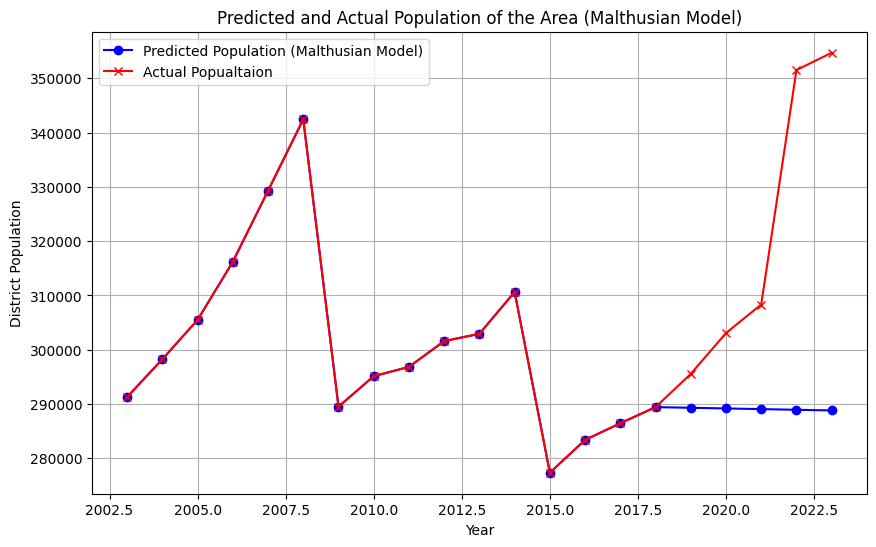

MSE: 1772725273.899657
R2: -1.7834767762206383


In [4]:
from sklearn.metrics import mean_squared_error, r2_score
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.set_index('Year', inplace=True)
y_train = df[df.index.year <= 2018]['District Population']
y_test = df[df.index.year > 2018]['District Population']


def malthusian_model(P0, r, t):
    return P0 * np.exp(r * t)


P0 = y_train.iloc[0]
r_values = []

for i in range(1, len(y_train)):
    r = np.log(y_train.iloc[i] / y_train.iloc[i-1])
    r_values.append(r)

r_mean = np.mean(r_values)


years_test = np.arange(2019, 2024) - 2018
predicted_population_malthus = malthusian_model(y_train.iloc[-1], r_mean, years_test)


if len(y_test) == len(predicted_population_malthus):
    
    mse_malthus = mean_squared_error(y_test, predicted_population_malthus)
    r2_malthus = r2_score(y_test, predicted_population_malthus)

    
    years_full = np.arange(2003, 2024)
    population_full_malthus = np.concatenate((y_train.values, predicted_population_malthus))

    plt.figure(figsize=(10, 6))
    plt.plot(years_full, population_full_malthus, marker='o', linestyle='-', color='b', label='Predicted Population (Malthusian Model)')
    plt.plot(df.index.year, df['District Population'], marker='x', linestyle='-', color='r', label='Actual Popualtaion')
    plt.xlabel('Year')
    plt.ylabel('District Population')
    plt.title('Predicted and Actual Population of the Area (Malthusian Model)')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f'MSE: {mse_malthus}')
    print(f'R2: {r2_malthus}')
else:
    print("Error: The sizes of the predicted and test datasets do not match.")


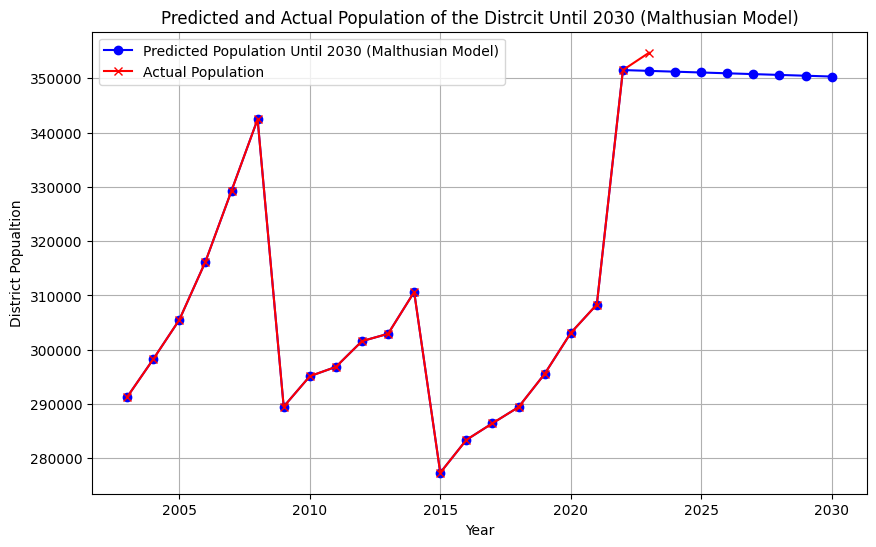

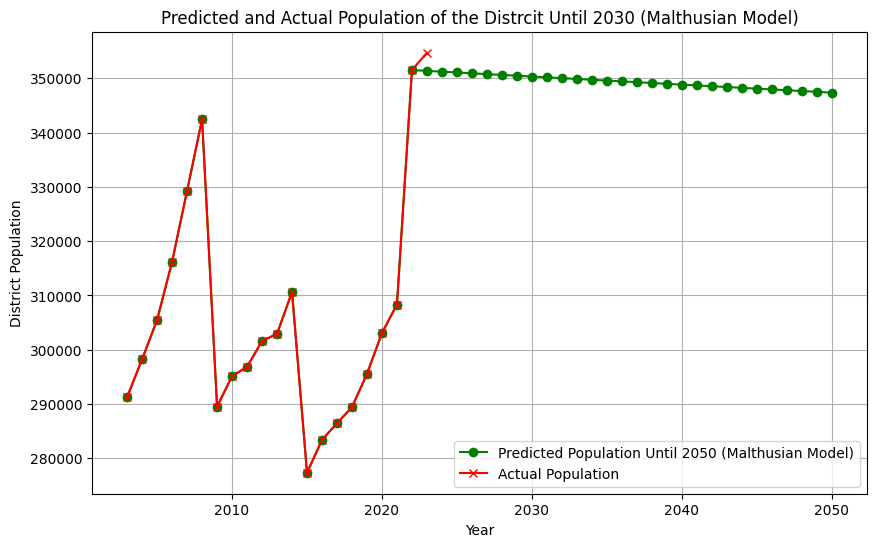

In [5]:
y_train_2030 = df[df.index.year <= 2022]['District Population']
y_test_2030 = df[df.index.year > 2022]['District Population']

years_2030 = np.arange(2023, 2031) - 2022
years_2050 = np.arange(2023, 2051) - 2022

predicted_population_malthus_2030 = malthusian_model(y_train_2030.iloc[-1], r_mean, years_2030)
predicted_population_malthus_2050 = malthusian_model(y_train_2030.iloc[-1], r_mean, years_2050)


years_full_2030 = np.arange(2003, 2031)
years_full_2050 = np.arange(2003, 2051)

population_full_malthus_2030 = np.concatenate((y_train_2030.values, predicted_population_malthus_2030))
population_full_malthus_2050 = np.concatenate((y_train_2030.values, predicted_population_malthus_2050))

# График до 2030 года
plt.figure(figsize=(10, 6))
plt.plot(years_full_2030, population_full_malthus_2030, marker='o', linestyle='-', color='b', label='Predicted Population Until 2030 (Malthusian Model)')
plt.plot(df.index.year, df['District Population'], marker='x', linestyle='-', color='r', label='Actual Population')
plt.xlabel('Year')
plt.ylabel('District Popualtion')
plt.title('Predicted and Actual Population of the Distrcit Until 2030 (Malthusian Model)')
plt.legend()
plt.grid(True)
plt.show()

# График до 2050 года
plt.figure(figsize=(10, 6))
plt.plot(years_full_2050, population_full_malthus_2050, marker='o', linestyle='-', color='g', label='Predicted Population Until 2050 (Malthusian Model)')
plt.plot(df.index.year, df['District Population'], marker='x', linestyle='-', color='r', label='Actual Population')
plt.xlabel('Year')
plt.ylabel('District Population')
plt.title('Predicted and Actual Population of the Distrcit Until 2030 (Malthusian Model)')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
forecast_years_2050 = np.arange(2023, 2051)
forecast_df_2050 = pd.DataFrame({
    'Year': forecast_years_2050,
    'Predicted District Population': predicted_population_malthus_2050
})

print("\nPredicted Population Until 2050 (Malthusian Model):")
print(forecast_df_2050)


Predicted Population Until 2050 (Malthusian Model):
    Year  Predicted District Population
0   2023                  351368.634316
1   2024                  351219.332101
2   2025                  351070.093326
3   2026                  350920.917965
4   2027                  350771.805991
5   2028                  350622.757377
6   2029                  350473.772097
7   2030                  350324.850122
8   2031                  350175.991427
9   2032                  350027.195985
10  2033                  349878.463768
11  2034                  349729.794750
12  2035                  349581.188904
13  2036                  349432.646202
14  2037                  349284.166619
15  2038                  349135.750127
16  2039                  348987.396700
17  2040                  348839.106311
18  2041                  348690.878933
19  2042                  348542.714538
20  2043                  348394.613102
21  2044                  348246.574596
22  2045                  3

In [7]:
last_year = df.index.year[-1]
steps_2024 = 2024 - last_year
steps_2030 = 2030 - last_year
steps_2050 = 2050 - last_year

/home/agytai/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
16:22:23 - cmdstanpy - INFO - Chain [1] start processing
16:22:24 - cmdstanpy - INFO - Chain [1] done processing
/home/agytai/.local/lib/python3.10/site-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


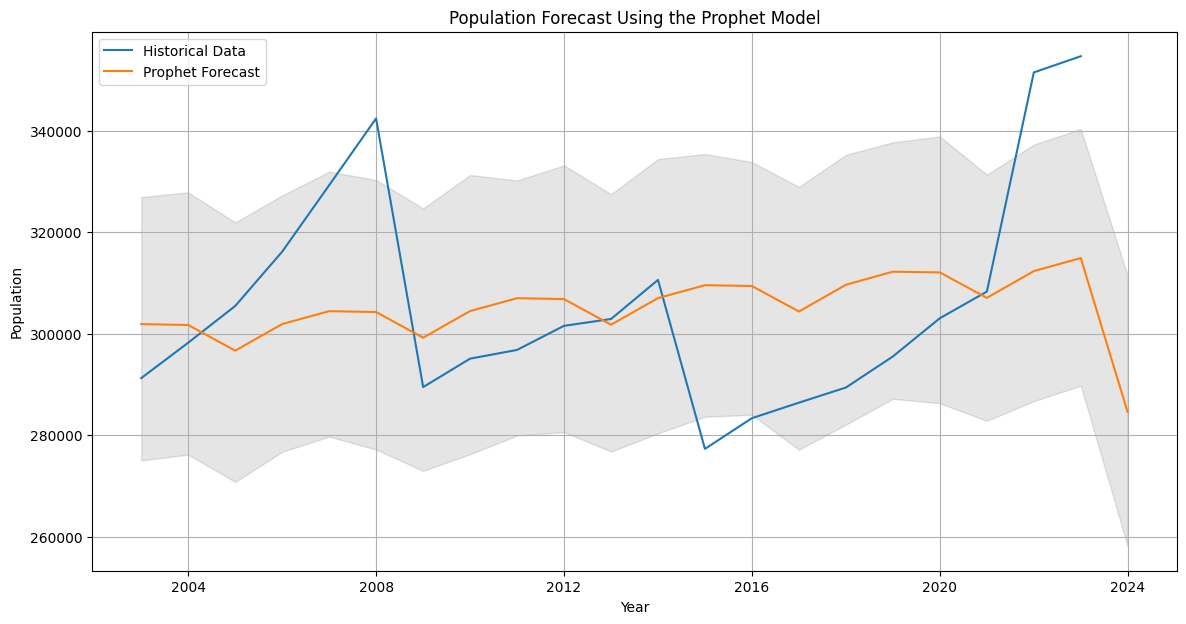

In [8]:
from prophet import Prophet
import matplotlib.pyplot as plt


df_prophet = df.reset_index()
df_prophet = df_prophet.rename(columns={'Year': 'ds', 'District Population': 'y'})


model_prophet = Prophet()
model_prophet.fit(df_prophet)


future = model_prophet.make_future_dataframe(periods=steps_2024, freq='Y')
forecast_prophet = model_prophet.predict(future)

plt.figure(figsize=(14, 7))
plt.plot(df['District Population'], label='Historical Data')
plt.plot(forecast_prophet['ds'], forecast_prophet['yhat'], label='Prophet Forecast')
plt.fill_between(forecast_prophet['ds'], forecast_prophet['yhat_lower'], forecast_prophet['yhat_upper'], color='k', alpha=0.1)
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Forecast Using the Prophet Model')
plt.legend()
plt.grid(True)
plt.show()


16:23:12 - cmdstanpy - INFO - Chain [1] start processing


16:23:12 - cmdstanpy - INFO - Chain [1] done processing
/home/agytai/.local/lib/python3.10/site-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


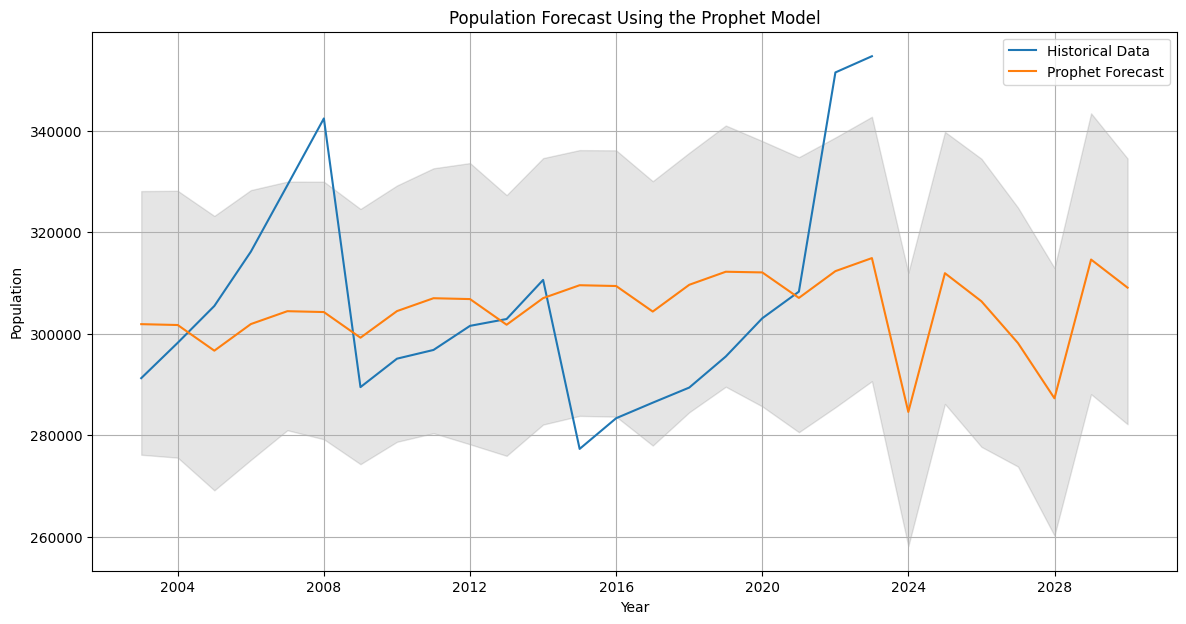

In [9]:
from prophet import Prophet
import matplotlib.pyplot as plt


df_prophet = df.reset_index()
df_prophet = df_prophet.rename(columns={'Year': 'ds', 'District Population': 'y'})


model_prophet = Prophet()
model_prophet.fit(df_prophet)


future = model_prophet.make_future_dataframe(periods=steps_2030, freq='Y')
forecast_prophet = model_prophet.predict(future)

plt.figure(figsize=(14, 7))
plt.plot(df['District Population'], label='Historical Data')
plt.plot(forecast_prophet['ds'], forecast_prophet['yhat'], label='Prophet Forecast')
plt.fill_between(forecast_prophet['ds'], forecast_prophet['yhat_lower'], forecast_prophet['yhat_upper'], color='k', alpha=0.1)
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Predicted and Actual Population of the District Until 2030 (Prophet Model)')
plt.legend()
plt.grid(True)
plt.show()


16:29:32 - cmdstanpy - INFO - Chain [1] start processing


16:29:32 - cmdstanpy - INFO - Chain [1] done processing
/home/agytai/.local/lib/python3.10/site-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


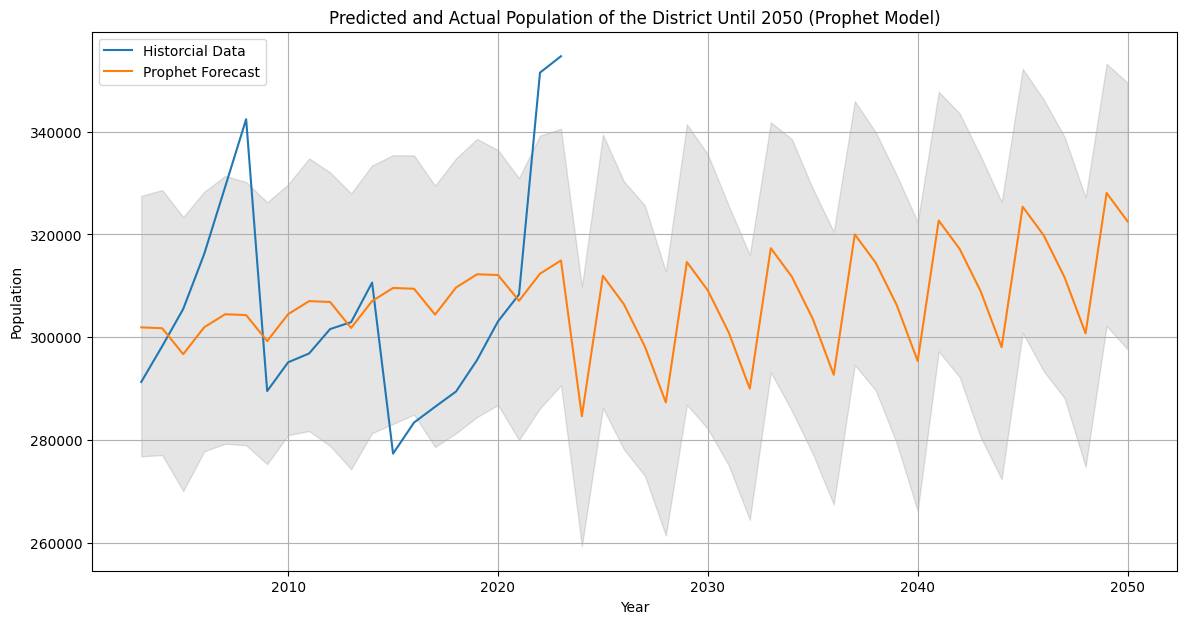

In [11]:
from prophet import Prophet
import matplotlib.pyplot as plt


df_prophet = df.reset_index()
df_prophet = df_prophet.rename(columns={'Year': 'ds', 'District Population': 'y'})


model_prophet = Prophet()
model_prophet.fit(df_prophet)


future = model_prophet.make_future_dataframe(periods=steps_2050, freq='Y')
forecast_prophet = model_prophet.predict(future)


plt.figure(figsize=(14, 7))
plt.plot(df['District Population'], label='Historcial Data')
plt.plot(forecast_prophet['ds'], forecast_prophet['yhat'], label='Prophet Forecast')
plt.fill_between(forecast_prophet['ds'], forecast_prophet['yhat_lower'], forecast_prophet['yhat_upper'], color='k', alpha=0.1)
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Predicted and Actual Population of the District Until 2050 (Prophet Model)')
plt.legend()
plt.grid(True)
plt.show()


In [12]:

forecast_df_prophet = forecast_prophet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast_df_prophet = forecast_df_prophet.rename(columns={'ds': 'Year', 'yhat': 'Predicted Population', 'yhat_lower': 'Lower Bound', 'yhat_upper': 'Upper Bound'})


forecast_df_prophet = forecast_df_prophet[forecast_df_prophet['Year'].dt.year <= 2050]


forecast_df_prophet['Year'] = forecast_df_prophet['Year'].dt.year
forecast_df_prophet.set_index('Year', inplace=True)


print(forecast_df_prophet.head(30))  


      Predicted Population    Lower Bound    Upper Bound
Year                                                    
2003         301917.397597  276799.387509  327521.158485
2004         301748.000647  277030.412484  328657.758624
2005         296692.283302  270053.247092  323392.152268
2006         301934.842290  277758.672873  328317.364911
2007         304472.416575  279256.221791  331411.886485
2008         304303.019720  278954.090227  330213.846874
2009         299247.302470  275272.825859  326260.803060
2010         304489.861566  280928.823192  329772.449058
2011         307027.435917  281724.799879  334820.198390
2012         306858.039153  278824.494986  332100.894864
2013         301802.321966  274295.813217  328000.820999
2014         307047.198138  281328.472024  333457.167922
2015         309588.749738  283104.394057  335454.178190
2016         309432.106896  284922.101403  335401.601540
2017         304400.029892  278608.329424  329509.197819
2018         309675.733492  281

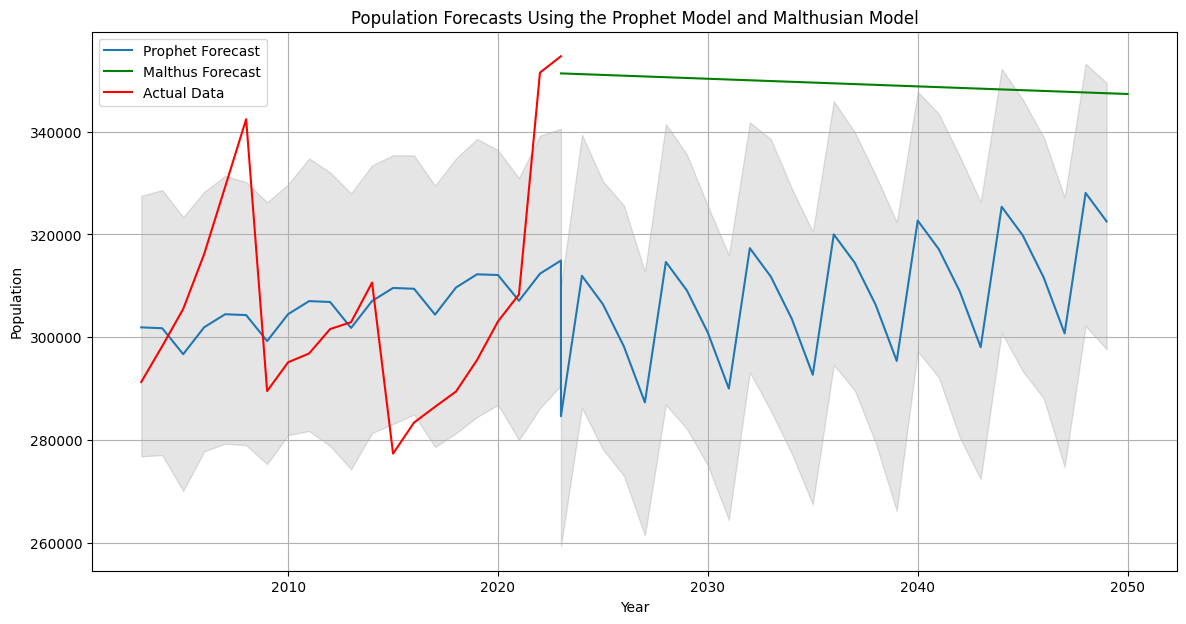

In [13]:
import matplotlib.pyplot as plt


plt.figure(figsize=(14, 7))
plt.plot(forecast_df_prophet.index, forecast_df_prophet['Predicted Population'], label='Prophet Forecast')
plt.fill_between(forecast_df_prophet.index, forecast_df_prophet['Lower Bound'], forecast_df_prophet['Upper Bound'], color='k', alpha=0.1)


plt.plot(forecast_df_2050['Year'], forecast_df_2050['Predicted District Population'], label='Malthus Forecast', color='green')
plt.plot(df.index.year, df['District Population'], label='Actual Data', color='red')


plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Forecasts Using the Prophet Model and Malthusian Model')
plt.legend()
plt.grid(True)
plt.show()
